In [18]:
import networkx as nx
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import random
import numpy as np

In [22]:
class SpectralClustering:

  def __init__(self, graph):
    self.graph= graph
    self.nlm = nx.linalg.normalized_laplacian_matrix(graph).toarray()
  
  def calc_eigenvector(self):
    eigen_values, eigen_vectors = np.linalg.eig(self.nlm)
    return eigen_vectors

  def fit(self,k):
    eigen_vectors = self.calc_eigenvector()
    k_eigenvectors = np.array(eigen_vectors)[:,:k]
    kmeans = KMeans(n_clusters = k)
    self.clusters = kmeans.fit(k_eigenvectors)
  
  def predict_labels(self):
    return self.clusters.labels_
  
  def assign_labels(self, labels):
    for i , node in enumerate(self.graph.nodes()):
      self.graph.nodes[node]['label'] = labels[i]

  def plot_graph(self, n_clusters):
    labels = self.predict_labels()
    self.assign_labels(labels)

    colors = ['red', 'pink', 'yellow', 'blue', 'green']
    sampled_colors = dict(zip(set(labels), random.sample(colors, n_clusters)))
    legends_handle = [mpatches.Patch(label = label, color = color) for label,color in sampled_colors.items()]
    node_colors = [sampled_colors[i] for i in labels]

    plt.figure(figsize = (10,10))
    plt.legend(handles = legends_handle)
    nx.draw(self.graph, node_color = node_colors, with_labels = True)
    plt.show()

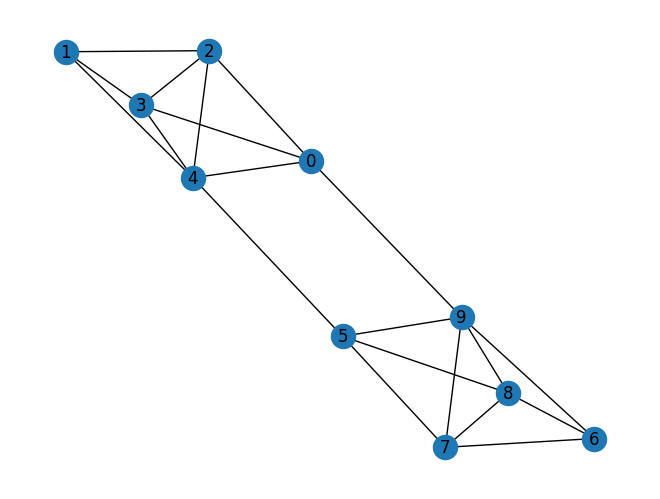

In [23]:
k = 2
g = nx.connected_caveman_graph(2,5)
nx.draw(g, with_labels = True)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


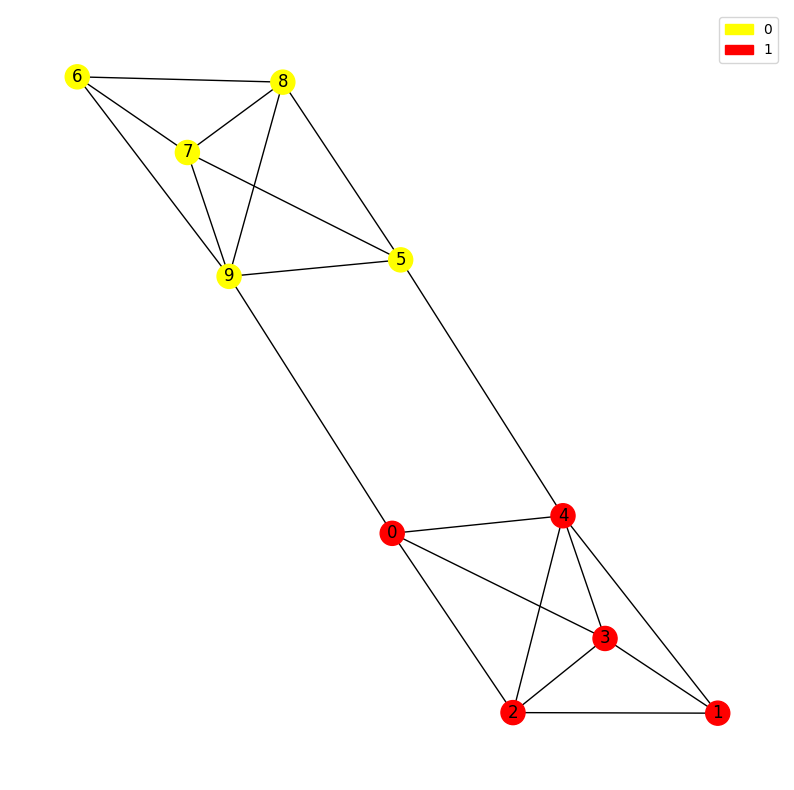

In [24]:
specClust = SpectralClustering(g)
specClust.fit(k)
specClust.plot_graph(k)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


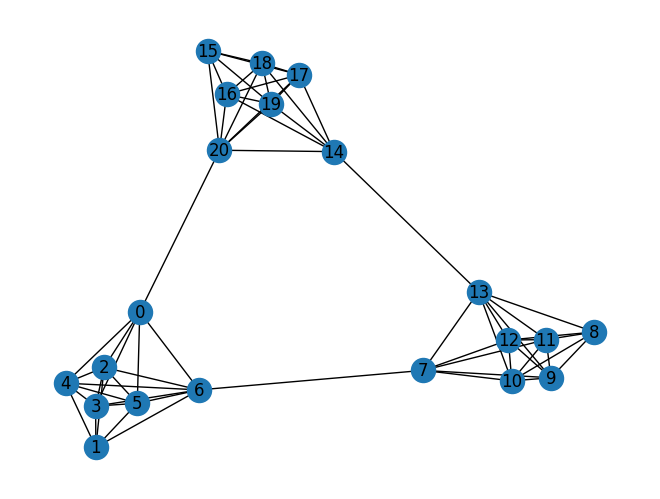

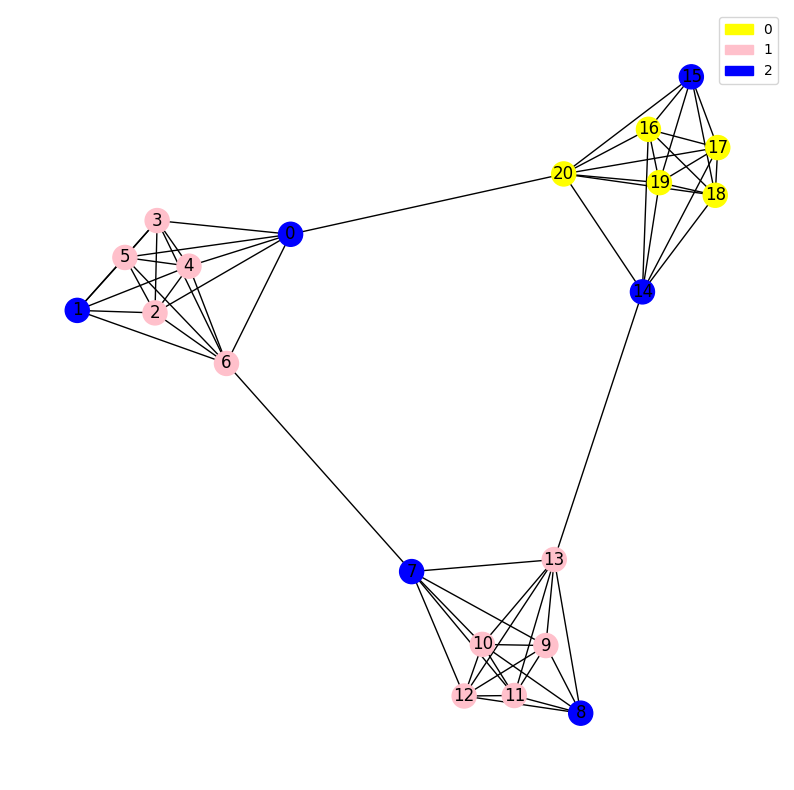

In [25]:
k = 3
g = nx.connected_caveman_graph(k, 7)
nx.draw(g, with_labels = True)

specClust = SpectralClustering(g)
specClust.fit(k)
specClust.plot_graph(k)